In [1]:
# Initial imports

from __future__ import division

import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [2]:
# Imports for better visualization

from collections import defaultdict
import json

import scipy as sp

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

/usr/local/lib/python2.7/dist-packages/matplotlib-2.0.0b1-py2.7-linux-x86_64.egg/matplotlib/__init__.py:895: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# Load training data
train_data = pd.read_csv('Data/Training_Dataset.csv')

In [4]:
# Load testing data
test_data = pd.read_csv('Data/Leaderboard_Dataset.csv')

In [5]:
train_data.head()

,citizen_id,party_voted_past,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,...,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,actual_vote
0,C1,Tokugawa,0,0,18,0,0,0,0,9,...,0,3,25-35,1.0,0.0,Degree,6,AEC,AEC,Tokugawa
1,C2,Ebony,2,6,0,2,0,2,5,0,...,0,3,18-24,1.0,0.0,Masters,5,AEC,AEC,Ebony
2,C3,Cosmos,0,0,0,0,6,0,0,0,...,15,1,46-55,1.0,1.0,Masters,6,AMS,AMS,Cosmos
3,C4,Centaur,2,0,0,0,0,2,0,0,...,0,1,36-45,1.0,0.0,Degree,6,ACL,ANQ,Centaur
4,C5,Centaur,9,2,3,0,2,1,0,1,...,7,4,25-35,1.0,0.0,Primary,7,ARK,ARK,Centaur


In [6]:
test_data.head()

,citizen_id,party_voted_past,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,...,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33
0,C70001,Centaur,13,1,0,0,0,13,1,0,...,0,0,4,55+,1.0,0.0,Masters,5,ATI,ATI
1,C70002,Ebony,0,6,7,0,0,0,3,2,...,0,0,3,46-55,1.0,0.0,Masters,5,AVJ,ANQ
2,C70003,Centaur,5,0,0,0,0,3,0,0,...,0,0,3,18-24,0.0,1.0,Degree,7,AHS,AHS
3,C70004,Ebony,14,7,3,15,0,4,4,1,...,15,0,3,25-35,0.0,0.0,Primary,6,AZG,ASQ
4,C70005,Cosmos,0,0,0,0,7,0,0,0,...,0,15,3,18-24,1.0,1.0,Masters,8,AXT,AWX


In [7]:
train_data.columns = ['citizen_id', 'party_voted_past', 'donation_centaur', 'donation_ebony', 'donation_toku', 'donation_odyssey', 'donation_cosmos', 'ind_rally_centaur', 'ind_rally_ebony', 'ind_rally_toku', 'ind_rally_odyssey', 'ind_rally_cosmos', 'group_rally_centaur', 'group_rally_ebony', 'group_rally_toku', 'group_rally_odyssey', 'group_rally_cosmos', 'fundraiser_centaur', 'fundraiser_ebony', 'fundraiser_toku', 'fundraiser_odyssey', 'fundraiser_cosmos', 'volunteer_centaur', 'volunteer_ebony', 'volunteer_toku', 'volunteer_odyssey', 'volunteer_cosmos', 'hh_size', 'age_bucket', 'married', 'home_ownership', 'education_level', 'newspapers', 'prev_residence', 'curr_residence', 'actual_vote']
test_data.columns = ['citizen_id', 'party_voted_past', 'donation_centaur', 'donation_ebony', 'donation_toku', 'donation_odyssey', 'donation_cosmos', 'ind_rally_centaur', 'ind_rally_ebony', 'ind_rally_toku', 'ind_rally_odyssey', 'ind_rally_cosmos', 'group_rally_centaur', 'group_rally_ebony', 'group_rally_toku', 'group_rally_odyssey', 'group_rally_cosmos', 'fundraiser_centaur', 'fundraiser_ebony', 'fundraiser_toku', 'fundraiser_odyssey', 'fundraiser_cosmos', 'volunteer_centaur', 'volunteer_ebony', 'volunteer_toku', 'volunteer_odyssey', 'volunteer_cosmos', 'hh_size', 'age_bucket', 'married', 'home_ownership', 'education_level', 'newspapers', 'prev_residence', 'curr_residence']

In [8]:
train_data.head()

,citizen_id,party_voted_past,donation_centaur,donation_ebony,donation_toku,donation_odyssey,donation_cosmos,ind_rally_centaur,ind_rally_ebony,ind_rally_toku,...,volunteer_cosmos,hh_size,age_bucket,married,home_ownership,education_level,newspapers,prev_residence,curr_residence,actual_vote
0,C1,Tokugawa,0,0,18,0,0,0,0,9,...,0,3,25-35,1.0,0.0,Degree,6,AEC,AEC,Tokugawa
1,C2,Ebony,2,6,0,2,0,2,5,0,...,0,3,18-24,1.0,0.0,Masters,5,AEC,AEC,Ebony
2,C3,Cosmos,0,0,0,0,6,0,0,0,...,15,1,46-55,1.0,1.0,Masters,6,AMS,AMS,Cosmos
3,C4,Centaur,2,0,0,0,0,2,0,0,...,0,1,36-45,1.0,0.0,Degree,6,ACL,ANQ,Centaur
4,C5,Centaur,9,2,3,0,2,1,0,1,...,7,4,25-35,1.0,0.0,Primary,7,ARK,ARK,Centaur


In [9]:
train_data.dtypes

citizen_id              object
party_voted_past        object
donation_centaur         int64
donation_ebony           int64
donation_toku            int64
donation_odyssey         int64
donation_cosmos          int64
ind_rally_centaur        int64
ind_rally_ebony          int64
ind_rally_toku           int64
ind_rally_odyssey        int64
ind_rally_cosmos         int64
group_rally_centaur      int64
group_rally_ebony        int64
group_rally_toku         int64
group_rally_odyssey      int64
group_rally_cosmos       int64
fundraiser_centaur       int64
fundraiser_ebony         int64
fundraiser_toku          int64
fundraiser_odyssey       int64
fundraiser_cosmos        int64
volunteer_centaur        int64
volunteer_ebony          int64
volunteer_toku           int64
volunteer_odyssey        int64
volunteer_cosmos         int64
hh_size                  int64
age_bucket              object
married                float64
home_ownership         float64
education_level         object
newspape

In [10]:
train_data.shape

(60129, 36)

In [11]:
test_data.shape

(21207, 35)

In [12]:
train_data.isnull().any()

citizen_id             False
party_voted_past       False
donation_centaur       False
donation_ebony         False
donation_toku          False
donation_odyssey       False
donation_cosmos        False
ind_rally_centaur      False
ind_rally_ebony        False
ind_rally_toku         False
ind_rally_odyssey      False
ind_rally_cosmos       False
group_rally_centaur    False
group_rally_ebony      False
group_rally_toku       False
group_rally_odyssey    False
group_rally_cosmos     False
fundraiser_centaur     False
fundraiser_ebony       False
fundraiser_toku        False
fundraiser_odyssey     False
fundraiser_cosmos      False
volunteer_centaur      False
volunteer_ebony        False
volunteer_toku         False
volunteer_odyssey      False
volunteer_cosmos       False
hh_size                False
age_bucket             False
married                 True
home_ownership          True
education_level         True
newspapers             False
prev_residence         False
curr_residence

In [13]:
test_data.isnull().any()

citizen_id             False
party_voted_past       False
donation_centaur       False
donation_ebony         False
donation_toku          False
donation_odyssey       False
donation_cosmos        False
ind_rally_centaur      False
ind_rally_ebony        False
ind_rally_toku         False
ind_rally_odyssey      False
ind_rally_cosmos       False
group_rally_centaur    False
group_rally_ebony      False
group_rally_toku       False
group_rally_odyssey    False
group_rally_cosmos     False
fundraiser_centaur     False
fundraiser_ebony       False
fundraiser_toku        False
fundraiser_odyssey     False
fundraiser_cosmos      False
volunteer_centaur      False
volunteer_ebony        False
volunteer_toku         False
volunteer_odyssey      False
volunteer_cosmos       False
hh_size                False
age_bucket             False
married                 True
home_ownership          True
education_level         True
newspapers             False
prev_residence         False
curr_residence

In [14]:
train_data['actual_vote'].value_counts()

Odyssey     13223
Centaur     12964
Cosmos      12959
Ebony       12937
Tokugawa     8046
Name: actual_vote, dtype: int64

In [15]:
train_data[train_data['married'].isnull()]

,citizen_id,party_voted_past,donation_centaur,donation_ebony,donation_toku,donation_odyssey,donation_cosmos,ind_rally_centaur,ind_rally_ebony,ind_rally_toku,...,volunteer_cosmos,hh_size,age_bucket,married,home_ownership,education_level,newspapers,prev_residence,curr_residence,actual_vote
3238,C3239,Ebony,1,20,0,0,0,1,8,0,...,0,4,18-24,NaN,NaN,NaN,7,AHL,ABX,Ebony
3553,C3554,Odyssey,1,1,0,8,0,1,1,0,...,15,4,55+,NaN,NaN,NaN,7,ASF,ASF,Odyssey
5373,C5374,Tokugawa,1,0,1,0,0,1,0,1,...,0,4,55+,NaN,NaN,NaN,4,ACL,AUM,Centaur
8232,C8233,Cosmos,0,3,0,0,4,0,0,0,...,6,4,18-24,NaN,NaN,NaN,7,AJI,AOV,Cosmos
12001,C12002,Odyssey,0,0,0,19,0,0,0,0,...,0,1,36-45,NaN,NaN,NaN,7,AMH,AWK,Odyssey
12279,C12280,Centaur,18,0,0,0,0,12,0,0,...,0,3,55+,NaN,NaN,NaN,7,AEC,AEC,Centaur
14554,C14555,Cosmos,0,2,0,0,2,0,2,0,...,15,1,25-35,NaN,NaN,NaN,5,AJI,ATI,Centaur
21256,C21257,Ebony,0,4,0,0,0,0,3,0,...,0,4,18-24,NaN,NaN,NaN,5,ACL,AGD,Ebony
21537,C21538,Centaur,7,0,0,0,0,4,0,0,...,0,1,55+,NaN,NaN,NaN,3,AMS,ARK,Centaur
23666,C23667,Odyssey,0,0,0,13,0,0,0,0,...,0,4,55+,NaN,NaN,NaN,6,AET,AWT,Odyssey


In [16]:
train_data[train_data['home_ownership'].isnull()]

,citizen_id,party_voted_past,donation_centaur,donation_ebony,donation_toku,donation_odyssey,donation_cosmos,ind_rally_centaur,ind_rally_ebony,ind_rally_toku,...,volunteer_cosmos,hh_size,age_bucket,married,home_ownership,education_level,newspapers,prev_residence,curr_residence,actual_vote
3238,C3239,Ebony,1,20,0,0,0,1,8,0,...,0,4,18-24,NaN,NaN,NaN,7,AHL,ABX,Ebony
3553,C3554,Odyssey,1,1,0,8,0,1,1,0,...,15,4,55+,NaN,NaN,NaN,7,ASF,ASF,Odyssey
5373,C5374,Tokugawa,1,0,1,0,0,1,0,1,...,0,4,55+,NaN,NaN,NaN,4,ACL,AUM,Centaur
8232,C8233,Cosmos,0,3,0,0,4,0,0,0,...,6,4,18-24,NaN,NaN,NaN,7,AJI,AOV,Cosmos
12001,C12002,Odyssey,0,0,0,19,0,0,0,0,...,0,1,36-45,NaN,NaN,NaN,7,AMH,AWK,Odyssey
12279,C12280,Centaur,18,0,0,0,0,12,0,0,...,0,3,55+,NaN,NaN,NaN,7,AEC,AEC,Centaur
14554,C14555,Cosmos,0,2,0,0,2,0,2,0,...,15,1,25-35,NaN,NaN,NaN,5,AJI,ATI,Centaur
21256,C21257,Ebony,0,4,0,0,0,0,3,0,...,0,4,18-24,NaN,NaN,NaN,5,ACL,AGD,Ebony
21537,C21538,Centaur,7,0,0,0,0,4,0,0,...,0,1,55+,NaN,NaN,NaN,3,AMS,ARK,Centaur
23666,C23667,Odyssey,0,0,0,13,0,0,0,0,...,0,4,55+,NaN,NaN,NaN,6,AET,AWT,Odyssey


In [17]:
train_data[train_data['education_level'].isnull()]

,citizen_id,party_voted_past,donation_centaur,donation_ebony,donation_toku,donation_odyssey,donation_cosmos,ind_rally_centaur,ind_rally_ebony,ind_rally_toku,...,volunteer_cosmos,hh_size,age_bucket,married,home_ownership,education_level,newspapers,prev_residence,curr_residence,actual_vote
3238,C3239,Ebony,1,20,0,0,0,1,8,0,...,0,4,18-24,NaN,NaN,NaN,7,AHL,ABX,Ebony
3553,C3554,Odyssey,1,1,0,8,0,1,1,0,...,15,4,55+,NaN,NaN,NaN,7,ASF,ASF,Odyssey
5373,C5374,Tokugawa,1,0,1,0,0,1,0,1,...,0,4,55+,NaN,NaN,NaN,4,ACL,AUM,Centaur
8232,C8233,Cosmos,0,3,0,0,4,0,0,0,...,6,4,18-24,NaN,NaN,NaN,7,AJI,AOV,Cosmos
12001,C12002,Odyssey,0,0,0,19,0,0,0,0,...,0,1,36-45,NaN,NaN,NaN,7,AMH,AWK,Odyssey
12279,C12280,Centaur,18,0,0,0,0,12,0,0,...,0,3,55+,NaN,NaN,NaN,7,AEC,AEC,Centaur
14554,C14555,Cosmos,0,2,0,0,2,0,2,0,...,15,1,25-35,NaN,NaN,NaN,5,AJI,ATI,Centaur
21256,C21257,Ebony,0,4,0,0,0,0,3,0,...,0,4,18-24,NaN,NaN,NaN,5,ACL,AGD,Ebony
21537,C21538,Centaur,7,0,0,0,0,4,0,0,...,0,1,55+,NaN,NaN,NaN,3,AMS,ARK,Centaur
23666,C23667,Odyssey,0,0,0,13,0,0,0,0,...,0,4,55+,NaN,NaN,NaN,6,AET,AWT,Odyssey


In [18]:
print stats.mode(train_data['married'].dropna())
print stats.mode(train_data['home_ownership'].dropna())
print stats.mode(train_data['education_level'].dropna())

ModeResult(mode=array([ 1.]), count=array([42268]))
ModeResult(mode=array([ 0.]), count=array([42022]))
ModeResult(mode=array(['Masters'], dtype=object), count=array([23913]))


/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:249: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [19]:
train_data['married'].fillna(stats.mode(train_data['married'].dropna())[0][0], inplace=True)
train_data['home_ownership'].fillna(stats.mode(train_data['home_ownership'].dropna())[0][0], inplace=True)
train_data['education_level'].fillna(stats.mode(train_data['education_level'].dropna())[0][0], inplace=True)

test_data['married'].fillna(stats.mode(train_data['married'].dropna())[0][0], inplace=True)
test_data['home_ownership'].fillna(stats.mode(train_data['home_ownership'].dropna())[0][0], inplace=True)
test_data['education_level'].fillna(stats.mode(train_data['education_level'].dropna())[0][0], inplace=True)

In [20]:
train_data['age_bucket'].value_counts()

25-35    18347
18-24    11803
46-55    11244
55+       9705
36-45     9030
Name: age_bucket, dtype: int64

In [21]:
def get_age_buckets(df):
    df.ix[(df['age_bucket'] == '18-24'), 'age_bucket'] = 1
    df.ix[(df['age_bucket'] == '25-35'), 'age_bucket'] = 2
    df.ix[(df['age_bucket'] == '36-45'), 'age_bucket'] = 3
    df.ix[(df['age_bucket'] == '46-55'), 'age_bucket'] = 4
    df.ix[(df['age_bucket'] == '55+'), 'age_bucket'] = 5
    return df

In [22]:
train_data = get_age_buckets(train_data)
test_data = get_age_buckets(test_data)
train_data.head()

,citizen_id,party_voted_past,donation_centaur,donation_ebony,donation_toku,donation_odyssey,donation_cosmos,ind_rally_centaur,ind_rally_ebony,ind_rally_toku,...,volunteer_cosmos,hh_size,age_bucket,married,home_ownership,education_level,newspapers,prev_residence,curr_residence,actual_vote
0,C1,Tokugawa,0,0,18,0,0,0,0,9,...,0,3,2,1.0,0.0,Degree,6,AEC,AEC,Tokugawa
1,C2,Ebony,2,6,0,2,0,2,5,0,...,0,3,1,1.0,0.0,Masters,5,AEC,AEC,Ebony
2,C3,Cosmos,0,0,0,0,6,0,0,0,...,15,1,4,1.0,1.0,Masters,6,AMS,AMS,Cosmos
3,C4,Centaur,2,0,0,0,0,2,0,0,...,0,1,3,1.0,0.0,Degree,6,ACL,ANQ,Centaur
4,C5,Centaur,9,2,3,0,2,1,0,1,...,7,4,2,1.0,0.0,Primary,7,ARK,ARK,Centaur


In [23]:
train_data['education_level'].value_counts()

Masters    23943
Degree     18561
Diploma    11077
Primary     6548
Name: education_level, dtype: int64

In [24]:
def get_ed_levels(df):
    df.ix[(df['education_level'] == 'Primary'), 'education_level'] = 1
    df.ix[(df['education_level'] == 'Degree'), 'education_level'] = 2
    df.ix[(df['education_level'] == 'Masters'), 'education_level'] = 3
    df.ix[(df['education_level'] == 'Diploma'), 'education_level'] = 4
    return df

In [25]:
train_data = get_ed_levels(train_data)
test_data = get_ed_levels(test_data)
train_data.head()

,citizen_id,party_voted_past,donation_centaur,donation_ebony,donation_toku,donation_odyssey,donation_cosmos,ind_rally_centaur,ind_rally_ebony,ind_rally_toku,...,volunteer_cosmos,hh_size,age_bucket,married,home_ownership,education_level,newspapers,prev_residence,curr_residence,actual_vote
0,C1,Tokugawa,0,0,18,0,0,0,0,9,...,0,3,2,1.0,0.0,2,6,AEC,AEC,Tokugawa
1,C2,Ebony,2,6,0,2,0,2,5,0,...,0,3,1,1.0,0.0,3,5,AEC,AEC,Ebony
2,C3,Cosmos,0,0,0,0,6,0,0,0,...,15,1,4,1.0,1.0,3,6,AMS,AMS,Cosmos
3,C4,Centaur,2,0,0,0,0,2,0,0,...,0,1,3,1.0,0.0,2,6,ACL,ANQ,Centaur
4,C5,Centaur,9,2,3,0,2,1,0,1,...,7,4,2,1.0,0.0,1,7,ARK,ARK,Centaur


In [26]:
train_data['prev_residence'].value_counts()

ACL    5240
AEC    3307
ATI    2463
ANQ    2430
AOV    2338
AJI    2322
ABX    2136
APH    1984
AHS    1928
AWX    1899
AHR    1601
AJV    1141
AMS    1126
AET    1084
AHO    1067
ASE     935
ARK     916
AII     869
AWI     831
ACD     805
AMR     786
AQU     778
AUE     761
AQX     718
AZG     665
AXT     661
ADV     630
AHJ     613
AXO     555
AYE     519
       ... 
AJY       1
AJX       1
AVR       1
AYF       1
AYP       1
AVZ       1
ACW       1
ACJ       1
ACB       1
ACC       1
AMQ       1
AMY       1
AMG       1
AMN       1
AWF       1
ATR       1
ANV       1
AEQ       1
ANJ       1
ANH       1
ANM       1
BAS       1
ANE       1
AEZ       1
AXI       1
AXY       1
AEH       1
AXQ       1
AXP       1
AZO       1
Name: prev_residence, dtype: int64

In [27]:
train_data['prev_residence'].value_counts().count()

456

In [28]:
test_data['prev_residence'].value_counts()

ACL    1791
AEC    1181
ANQ     884
AOV     874
ATI     855
AJI     837
ABX     753
AHS     697
APH     656
AWX     637
AHR     545
AHO     414
AJV     377
AMS     368
AET     358
ARK     319
ASE     317
AII     305
AWI     298
ACD     277
AQU     268
AMR     267
AUE     260
ADV     260
AQX     257
AHJ     239
AZG     235
AXT     223
AXO     212
AYE     199
       ... 
ANJ       1
ANF       1
ALO       1
AEX       1
AEU       1
AEQ       1
AWJ       1
AXK       1
AXD       1
AXB       1
AVI       1
AVK       1
AVF       1
ACK       1
AUY       1
AUW       1
AUS       1
AUH       1
AUB       1
AUC       1
AUA       1
AKB       1
AKH       1
AKP       1
ADA       1
ADW       1
ACY       1
ACR       1
ACJ       1
AGO       1
Name: prev_residence, dtype: int64

In [29]:
test_data['prev_residence'].value_counts().count()

373

In [30]:
train_data['curr_residence'].value_counts()

ACL    3869
AEC    3356
ATI    2586
ANQ    2549
AJI    2482
ABX    2370
AOV    2360
AHS    1978
APH    1818
AWX    1749
AHR    1596
AJV    1292
AMS    1191
AHO    1130
AET    1127
ARK    1006
ASE     938
AII     862
ACD     852
AUE     847
AWI     844
AMR     825
AQU     795
AQX     704
AZG     689
AHJ     670
AXT     654
ADV     644
ATU     588
AXO     572
       ... 
AUO       1
AUB       1
AKI       1
AKV       1
ADQ       1
AZS       1
ADT       1
AVQ       1
AVP       1
AEM       1
AED       1
AEX       1
BAF       1
BAC       1
ATD       1
ATB       1
ATN       1
ATQ       1
AJX       1
AJY       1
AIY       1
AIR       1
AIM       1
AIL       1
AIO       1
AIK       1
AIC       1
AZM       1
AZR       1
AGO       1
Name: curr_residence, dtype: int64

In [31]:
train_data['curr_residence'].value_counts().count()

465

In [32]:
test_data['curr_residence'].value_counts()

ACL    1399
AEC    1167
ANQ     929
AOV     913
ATI     910
AJI     885
ABX     814
AHS     741
APH     602
AWX     590
AHR     587
AJV     444
AMS     392
AHO     380
AET     379
ARK     342
AII     325
ACD     323
ASE     296
AWI     290
AQU     289
AUE     273
AMR     268
AHJ     260
ADV     255
AZG     248
AQX     231
AXO     212
AXT     204
ATU     200
       ... 
ACJ       1
AVK       1
AMG       1
AMD       1
AMB       1
ANJ       1
ANF       1
AUP       1
AUS       1
APQ       1
ALZ       1
ATK       1
ATM       1
BAH       1
BAS       1
BAU       1
ALS       1
ALU       1
ALW       1
ALC       1
AXW       1
ALD       1
ALI       1
ALK       1
ALL       1
BBC       1
AUY       1
BBQ       1
AUT       1
AQJ       1
Name: curr_residence, dtype: int64

In [33]:
test_data['curr_residence'].value_counts().count()

355

In [34]:
train_data['num_actual_vote'] = train_data['actual_vote'].map({'Centaur': 1, 'Ebony': 2, 'Tokugawa': 3, 'Odyssey': 4, 'Cosmos': 5})
train_data['num_prev_vote'] = train_data['party_voted_past'].map({'Centaur': 1, 'Ebony': 2, 'Tokugawa': 3, 'Odyssey': 4, 'Cosmos': 5})

test_data['num_prev_vote'] = test_data['party_voted_past'].map({'Centaur': 1, 'Ebony': 2, 'Tokugawa': 3, 'Odyssey': 4, 'Cosmos': 5})

train_data.head()

,citizen_id,party_voted_past,donation_centaur,donation_ebony,donation_toku,donation_odyssey,donation_cosmos,ind_rally_centaur,ind_rally_ebony,ind_rally_toku,...,age_bucket,married,home_ownership,education_level,newspapers,prev_residence,curr_residence,actual_vote,num_actual_vote,num_prev_vote
0,C1,Tokugawa,0,0,18,0,0,0,0,9,...,2,1.0,0.0,2,6,AEC,AEC,Tokugawa,3,3
1,C2,Ebony,2,6,0,2,0,2,5,0,...,1,1.0,0.0,3,5,AEC,AEC,Ebony,2,2
2,C3,Cosmos,0,0,0,0,6,0,0,0,...,4,1.0,1.0,3,6,AMS,AMS,Cosmos,5,5
3,C4,Centaur,2,0,0,0,0,2,0,0,...,3,1.0,0.0,2,6,ACL,ANQ,Centaur,1,1
4,C5,Centaur,9,2,3,0,2,1,0,1,...,2,1.0,0.0,1,7,ARK,ARK,Centaur,1,1


In [35]:
train_data.groupby('prev_residence')['num_prev_vote'].mean()

prev_residence
AAB    2.692308
AAC    1.200000
AAE    2.946667
AAF    2.000000
AAI    2.000000
AAM    2.961538
AAN    1.250000
AAO    4.666667
AAP    1.000000
AAQ    5.000000
AAS    2.000000
AAT    3.000000
AAV    2.000000
AAY    2.000000
ABA    3.381356
ABD    2.333333
ABG    2.641026
ABI    5.000000
ABJ    3.291667
ABK    2.384615
ABL    2.200000
ABO    1.666667
ABQ    4.000000
ABR    1.000000
ABT    4.078431
ABW    2.666667
ABX    2.267790
ABY    2.333333
ACA    1.857143
ACB    4.000000
         ...   
AZN    2.666667
AZO    2.000000
AZP    2.572519
AZQ    2.769231
AZR    2.000000
AZS    1.000000
AZT    3.000000
AZU    1.727273
AZV    2.376623
AZW    2.000000
AZZ    2.000000
BAC    5.000000
BAD    4.250000
BAH    2.000000
BAI    2.058824
BAK    4.000000
BAN    1.551020
BAP    5.000000
BAQ    3.000000
BAS    2.000000
BAU    3.250000
BAX    4.000000
BAZ    3.166667
BBB    3.142857
BBC    3.000000
BBD    1.000000
BBH    4.875000
BBJ    5.000000
BBK    3.121212
BBQ    4.000000
Name: num

In [36]:
train_data.groupby('prev_residence')['num_prev_vote'].std()

prev_residence
AAB    1.315587
AAC    0.447214
AAE    1.481071
AAF    0.000000
AAI    0.000000
AAM    1.427747
AAN    0.866025
AAO    0.577350
AAP         NaN
AAQ         NaN
AAS         NaN
AAT    1.809068
AAV    0.000000
AAY         NaN
ABA    1.364504
ABD    2.309401
ABG    1.739437
ABI    0.000000
ABJ    1.706233
ABK    1.358732
ABL    1.788854
ABO    0.577350
ABQ    1.732051
ABR         NaN
ABT    1.467558
ABW    2.081666
ABX    0.810593
ABY    0.899735
ACA    1.350621
ACB         NaN
         ...   
AZN    1.639075
AZO         NaN
AZP    1.539383
AZQ    1.589227
AZR    0.000000
AZS    0.000000
AZT    2.190890
AZU    1.618080
AZV    1.235856
AZW    1.732051
AZZ    0.000000
BAC    0.000000
BAD    1.500000
BAH    0.000000
BAI    0.826936
BAK         NaN
BAN    1.225786
BAP         NaN
BAQ    2.828427
BAS         NaN
BAU    1.500000
BAX         NaN
BAZ    1.946247
BBB    1.878449
BBC    1.154701
BBD         NaN
BBH    0.353553
BBJ         NaN
BBK    1.849959
BBQ    1.414214
Name: num

In [37]:
train_data['prev_residence_mean'] = train_data['prev_residence'].map(train_data.groupby('prev_residence')['num_prev_vote'].mean())
train_data['prev_residence_std'] = train_data['prev_residence'].map(train_data.groupby('prev_residence')['num_prev_vote'].std())
train_data['prev_residence_mean'].fillna(0)
train_data['prev_residence_std'].fillna(0)
train_data.head()

test_data['prev_residence_mean'] = test_data['prev_residence'].map(test_data.groupby('prev_residence')['num_prev_vote'].mean())
test_data['prev_residence_std'] = test_data['prev_residence'].map(test_data.groupby('prev_residence')['num_prev_vote'].std())
test_data['prev_residence_mean'].fillna(0)
test_data['prev_residence_std'].fillna(0)
test_data.head()

,citizen_id,party_voted_past,donation_centaur,donation_ebony,donation_toku,donation_odyssey,donation_cosmos,ind_rally_centaur,ind_rally_ebony,ind_rally_toku,...,age_bucket,married,home_ownership,education_level,newspapers,prev_residence,curr_residence,num_prev_vote,prev_residence_mean,prev_residence_std
0,C70001,Centaur,13,1,0,0,0,13,1,0,...,5,1.0,0.0,3,5,ATI,ATI,1,2.872515,1.926976
1,C70002,Ebony,0,6,7,0,0,0,3,2,...,4,1.0,0.0,3,5,AVJ,ANQ,2,3.034483,1.475581
2,C70003,Centaur,5,0,0,0,0,3,0,0,...,1,0.0,1.0,2,7,AHS,AHS,1,1.256815,0.894612
3,C70004,Ebony,14,7,3,15,0,4,4,1,...,2,0.0,0.0,1,6,AZG,ASQ,2,3.063830,1.336603
4,C70005,Cosmos,0,0,0,0,7,0,0,0,...,1,1.0,1.0,3,8,AXT,AWX,5,3.340807,1.500899


In [38]:
train_data['curr_residence_mean'] = train_data['curr_residence'].map(train_data.groupby('curr_residence')['num_prev_vote'].mean())
train_data['curr_residence_std'] = train_data['curr_residence'].map(train_data.groupby('curr_residence')['num_prev_vote'].std())
train_data['curr_residence_mean'].fillna(0)
train_data['curr_residence_std'].fillna(0)
train_data.head()

test_data['curr_residence_mean'] = test_data['curr_residence'].map(test_data.groupby('curr_residence')['num_prev_vote'].mean())
test_data['curr_residence_std'] = test_data['curr_residence'].map(test_data.groupby('curr_residence')['num_prev_vote'].std())
test_data['curr_residence_mean'].fillna(0)
test_data['curr_residence_std'].fillna(0)
test_data.head()

,citizen_id,party_voted_past,donation_centaur,donation_ebony,donation_toku,donation_odyssey,donation_cosmos,ind_rally_centaur,ind_rally_ebony,ind_rally_toku,...,home_ownership,education_level,newspapers,prev_residence,curr_residence,num_prev_vote,prev_residence_mean,prev_residence_std,curr_residence_mean,curr_residence_std
0,C70001,Centaur,13,1,0,0,0,13,1,0,...,0.0,3,5,ATI,ATI,1,2.872515,1.926976,2.920879,1.928965
1,C70002,Ebony,0,6,7,0,0,0,3,2,...,0.0,3,5,AVJ,ANQ,2,3.034483,1.475581,2.463940,1.026083
2,C70003,Centaur,5,0,0,0,0,3,0,0,...,1.0,2,7,AHS,AHS,1,1.256815,0.894612,1.259109,0.879382
3,C70004,Ebony,14,7,3,15,0,4,4,1,...,0.0,1,6,AZG,ASQ,2,3.063830,1.336603,2.400000,0.940325
4,C70005,Cosmos,0,0,0,0,7,0,0,0,...,1.0,3,8,AXT,AWX,5,3.340807,1.500899,4.030508,1.486470


In [39]:
train_data['actual_vote'].value_counts()

Odyssey     13223
Centaur     12964
Cosmos      12959
Ebony       12937
Tokugawa     8046
Name: actual_vote, dtype: int64

In [40]:
train_data['party_voted_past'].value_counts()

Ebony       14382
Centaur     13410
Cosmos      13333
Odyssey     12760
Tokugawa     6244
Name: party_voted_past, dtype: int64

In [41]:
train_data.columns

Index([u'citizen_id', u'party_voted_past', u'donation_centaur',
       u'donation_ebony', u'donation_toku', u'donation_odyssey',
       u'donation_cosmos', u'ind_rally_centaur', u'ind_rally_ebony',
       u'ind_rally_toku', u'ind_rally_odyssey', u'ind_rally_cosmos',
       u'group_rally_centaur', u'group_rally_ebony', u'group_rally_toku',
       u'group_rally_odyssey', u'group_rally_cosmos', u'fundraiser_centaur',
       u'fundraiser_ebony', u'fundraiser_toku', u'fundraiser_odyssey',
       u'fundraiser_cosmos', u'volunteer_centaur', u'volunteer_ebony',
       u'volunteer_toku', u'volunteer_odyssey', u'volunteer_cosmos',
       u'hh_size', u'age_bucket', u'married', u'home_ownership',
       u'education_level', u'newspapers', u'prev_residence', u'curr_residence',
       u'actual_vote', u'num_actual_vote', u'num_prev_vote',
       u'prev_residence_mean', u'prev_residence_std', u'curr_residence_mean',
       u'curr_residence_std'],
      dtype='object')

(array([ 12964.,      0.,  12937.,      0.,      0.,   8046.,      0.,
         13223.,      0.,  12959.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

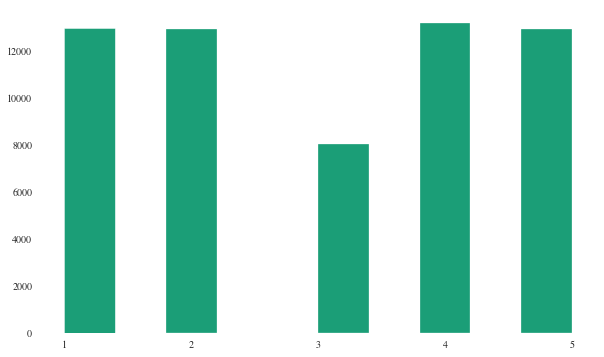

In [42]:
plt.hist(train_data['num_actual_vote'])

(array([ 13410.,      0.,  14382.,      0.,      0.,   6244.,      0.,
         12760.,      0.,  13333.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

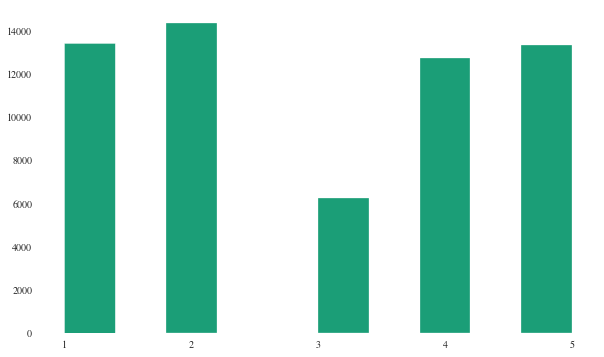

In [43]:
plt.hist(train_data['num_prev_vote'])

(array([ 44827.,   5376.,   3252.,   2097.,   1424.,   1051.,    707.,
           541.,    414.,    440.]),
 array([  0. ,   2.1,   4.2,   6.3,   8.4,  10.5,  12.6,  14.7,  16.8,
         18.9,  21. ]),
 <a list of 10 Patch objects>)

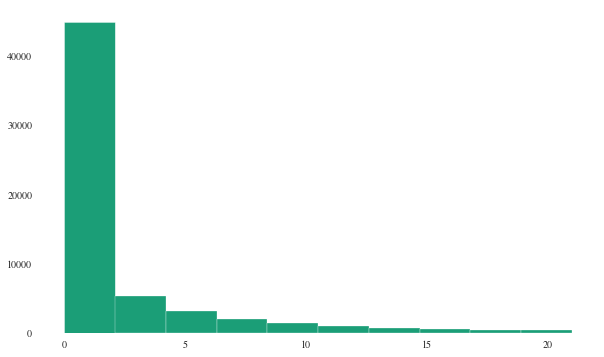

In [44]:
plt.hist(train_data['donation_centaur'])

(array([ 46344.,   4741.,   2859.,   1890.,   1270.,    954.,    674.,
           513.,    413.,    471.]),
 array([  0. ,   2.1,   4.2,   6.3,   8.4,  10.5,  12.6,  14.7,  16.8,
         18.9,  21. ]),
 <a list of 10 Patch objects>)

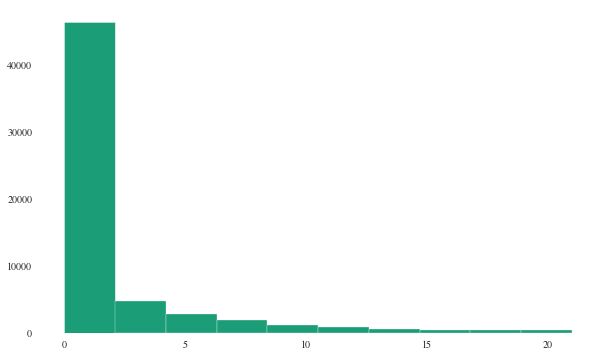

In [45]:
plt.hist(train_data['donation_cosmos'])

(array([ 44236.,   5178.,   3396.,   2249.,   1682.,   1128.,    769.,
           605.,    462.,    424.]),
 array([  0. ,   2.1,   4.2,   6.3,   8.4,  10.5,  12.6,  14.7,  16.8,
         18.9,  21. ]),
 <a list of 10 Patch objects>)

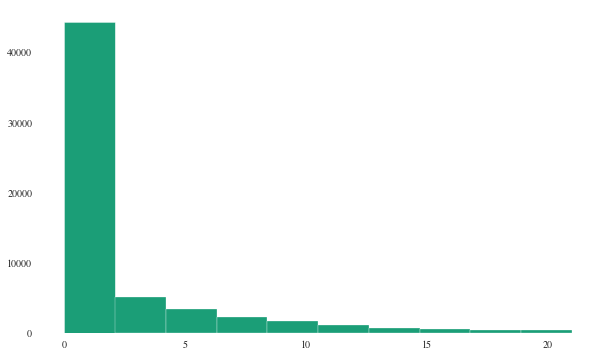

In [46]:
plt.hist(train_data['donation_ebony'])

(array([ 43174.,   4758.,   3511.,   2618.,   1908.,   1358.,    978.,
           701.,    515.,    608.]),
 array([  0. ,   2.1,   4.2,   6.3,   8.4,  10.5,  12.6,  14.7,  16.8,
         18.9,  21. ]),
 <a list of 10 Patch objects>)

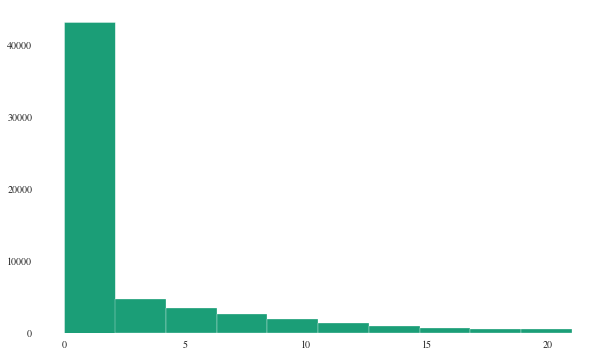

In [47]:
plt.hist(train_data['donation_odyssey'])

(array([ 51456.,   2595.,   1772.,   1265.,    940.,    644.,    505.,
           398.,    247.,    307.]),
 array([  0. ,   2.1,   4.2,   6.3,   8.4,  10.5,  12.6,  14.7,  16.8,
         18.9,  21. ]),
 <a list of 10 Patch objects>)

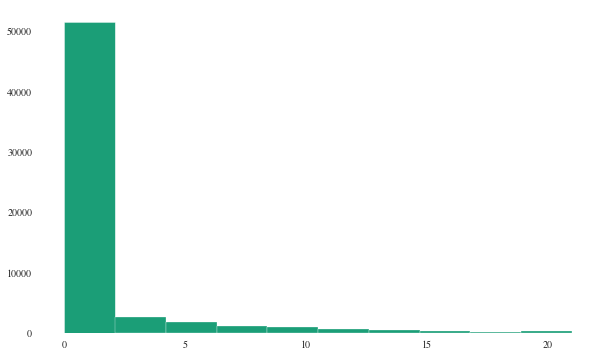

In [48]:
plt.hist(train_data['donation_toku'])

(array([  5.12830000e+04,   4.40200000e+03,   1.98000000e+03,
          1.06200000e+03,   6.05000000e+02,   3.53000000e+02,
          2.19000000e+02,   1.31000000e+02,   5.60000000e+01,
          3.80000000e+01]),
 array([  0. ,   2.1,   4.2,   6.3,   8.4,  10.5,  12.6,  14.7,  16.8,
         18.9,  21. ]),
 <a list of 10 Patch objects>)

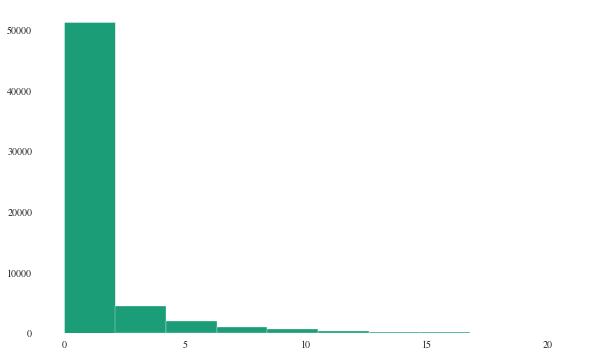

In [49]:
plt.hist(train_data['ind_rally_centaur'])

(array([  5.21650000e+04,   3.84700000e+03,   1.78000000e+03,
          1.02100000e+03,   5.93000000e+02,   3.20000000e+02,
          1.98000000e+02,   1.03000000e+02,   5.40000000e+01,
          4.80000000e+01]),
 array([  0. ,   2.1,   4.2,   6.3,   8.4,  10.5,  12.6,  14.7,  16.8,
         18.9,  21. ]),
 <a list of 10 Patch objects>)

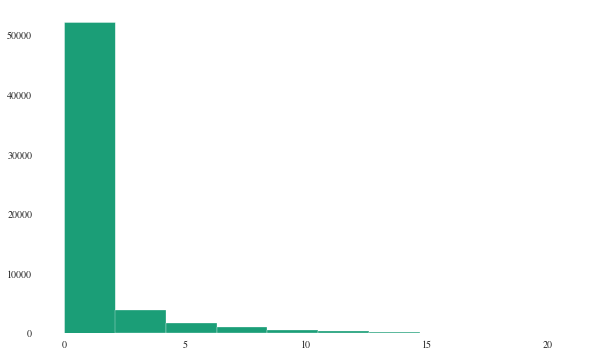

In [50]:
plt.hist(train_data['ind_rally_cosmos'])

(array([  5.29500000e+04,   3.71000000e+03,   1.64700000e+03,
          8.64000000e+02,   4.48000000e+02,   2.47000000e+02,
          1.45000000e+02,   7.80000000e+01,   2.80000000e+01,
          1.20000000e+01]),
 array([  0. ,   2.1,   4.2,   6.3,   8.4,  10.5,  12.6,  14.7,  16.8,
         18.9,  21. ]),
 <a list of 10 Patch objects>)

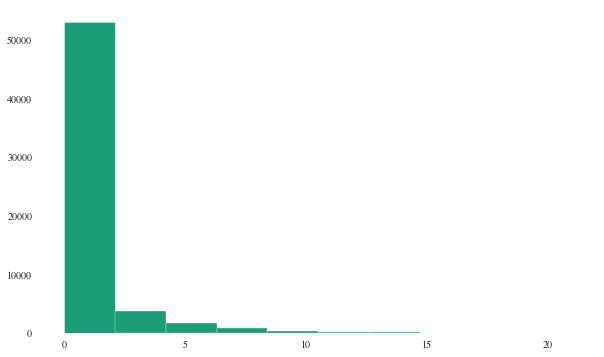

In [51]:
plt.hist(train_data['ind_rally_ebony'])

(array([ 48197.,   5068.,   2821.,   1743.,    962.,    594.,    369.,
           189.,    129.,     57.]),
 array([  0. ,   2.1,   4.2,   6.3,   8.4,  10.5,  12.6,  14.7,  16.8,
         18.9,  21. ]),
 <a list of 10 Patch objects>)

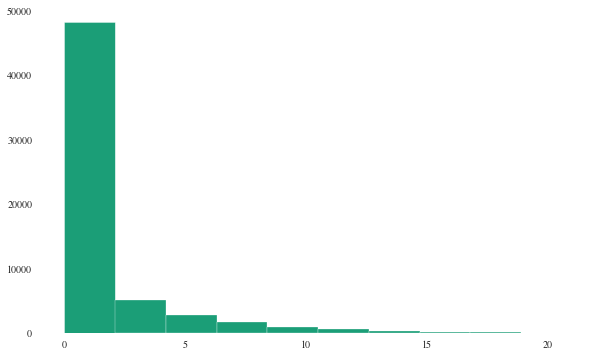

In [52]:
plt.hist(train_data['ind_rally_odyssey'])

(array([  5.39050000e+04,   3.67100000e+03,   1.42600000e+03,
          3.66000000e+02,   4.38000000e+02,   1.78000000e+02,
          5.50000000e+01,   5.50000000e+01,   3.00000000e+01,
          5.00000000e+00]),
 array([  0. ,   1.7,   3.4,   5.1,   6.8,   8.5,  10.2,  11.9,  13.6,
         15.3,  17. ]),
 <a list of 10 Patch objects>)

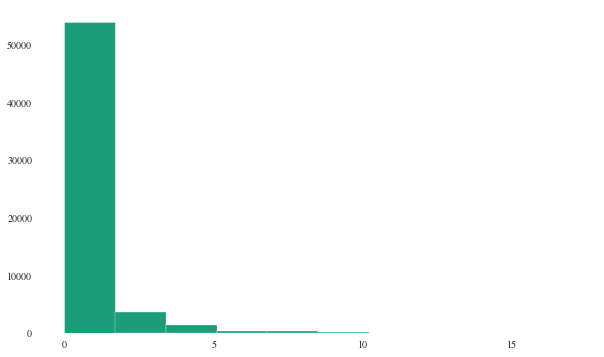

In [53]:
plt.hist(train_data['ind_rally_toku'])

(array([  4.99040000e+04,   6.69800000e+03,   2.21900000e+03,
          8.10000000e+02,   3.23000000e+02,   1.15000000e+02,
          4.30000000e+01,   1.20000000e+01,   3.00000000e+00,
          2.00000000e+00]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

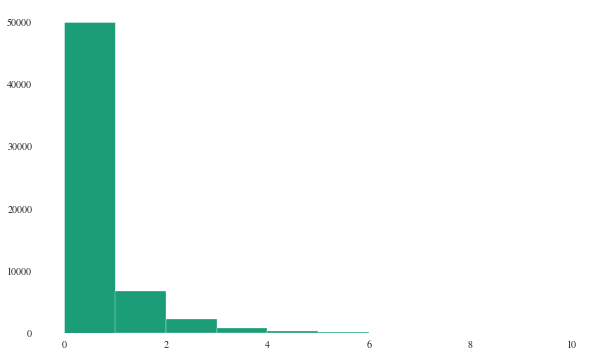

In [54]:
plt.hist(train_data['group_rally_centaur'])

(array([  4.86920000e+04,   6.70900000e+03,   2.51200000e+03,
          1.21400000e+03,   5.70000000e+02,   2.71000000e+02,
          1.01000000e+02,   4.70000000e+01,   1.00000000e+01,
          3.00000000e+00]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

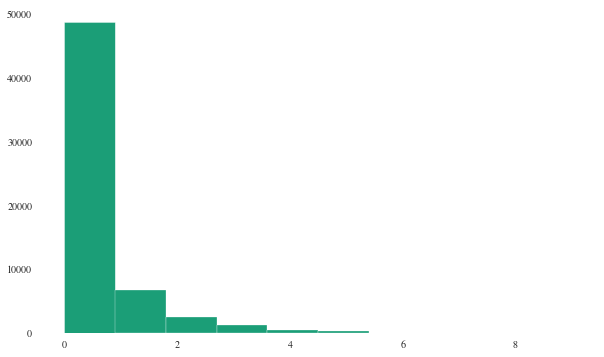

In [55]:
plt.hist(train_data['group_rally_cosmos'])

(array([  5.25050000e+04,   5.69300000e+03,   1.40000000e+03,
          0.00000000e+00,   3.93000000e+02,   1.04000000e+02,
          0.00000000e+00,   2.30000000e+01,   7.00000000e+00,
          4.00000000e+00]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

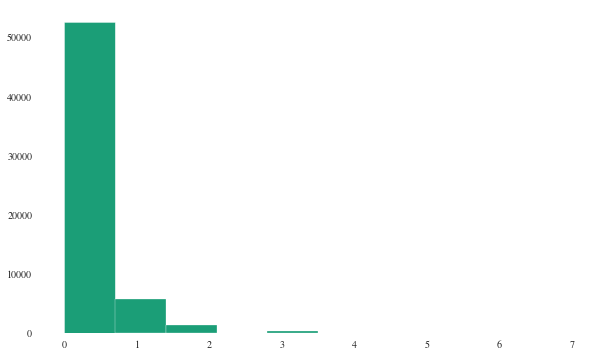

In [56]:
plt.hist(train_data['group_rally_ebony'])

(array([  4.90370000e+04,   6.33600000e+03,   2.74000000e+03,
          1.20700000e+03,   5.04000000e+02,   1.93000000e+02,
          7.30000000e+01,   2.70000000e+01,   9.00000000e+00,
          3.00000000e+00]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

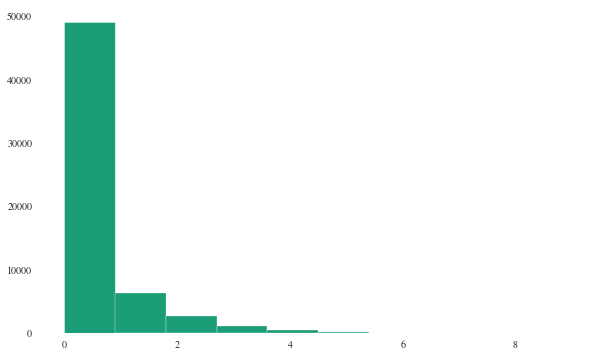

In [57]:
plt.hist(train_data['group_rally_odyssey'])

(array([  5.39430000e+04,   3.71000000e+03,   1.49700000e+03,
          5.64000000e+02,   2.55000000e+02,   1.04000000e+02,
          4.20000000e+01,   9.00000000e+00,   4.00000000e+00,
          1.00000000e+00]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

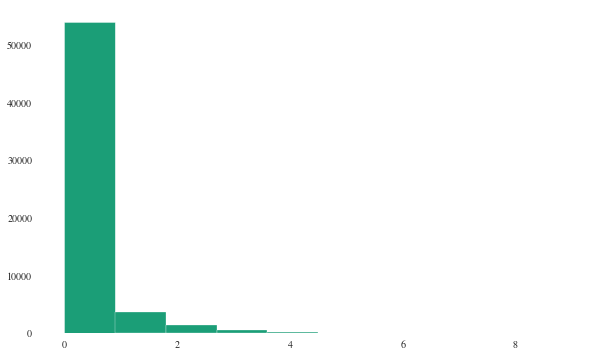

In [58]:
plt.hist(train_data['group_rally_toku'])

(array([  5.65510000e+04,   2.20500000e+03,   7.45000000e+02,
          3.09000000e+02,   8.80000000e+01,   1.24000000e+02,
          5.40000000e+01,   3.10000000e+01,   1.40000000e+01,
          8.00000000e+00]),
 array([  0. ,   1.8,   3.6,   5.4,   7.2,   9. ,  10.8,  12.6,  14.4,
         16.2,  18. ]),
 <a list of 10 Patch objects>)

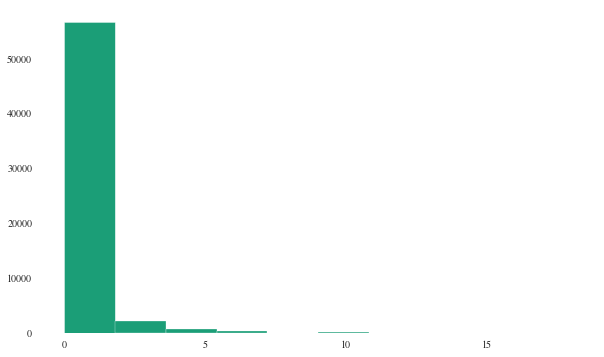

In [59]:
plt.hist(train_data['fundraiser_centaur'])

(array([  5.92510000e+04,   5.48000000e+02,   1.84000000e+02,
          7.50000000e+01,   2.00000000e+01,   3.00000000e+01,
          8.00000000e+00,   7.00000000e+00,   3.00000000e+00,
          3.00000000e+00]),
 array([  0. ,   1.8,   3.6,   5.4,   7.2,   9. ,  10.8,  12.6,  14.4,
         16.2,  18. ]),
 <a list of 10 Patch objects>)

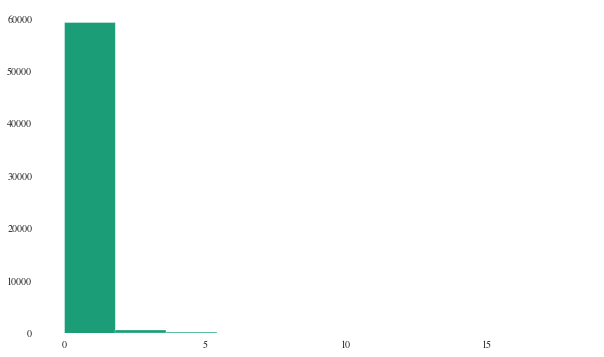

In [60]:
plt.hist(train_data['fundraiser_cosmos'])

(array([  5.08450000e+04,   6.03300000e+03,   1.95100000e+03,
          7.65000000e+02,   1.67000000e+02,   2.10000000e+02,
          8.60000000e+01,   4.90000000e+01,   1.80000000e+01,
          5.00000000e+00]),
 array([  0. ,   1.8,   3.6,   5.4,   7.2,   9. ,  10.8,  12.6,  14.4,
         16.2,  18. ]),
 <a list of 10 Patch objects>)

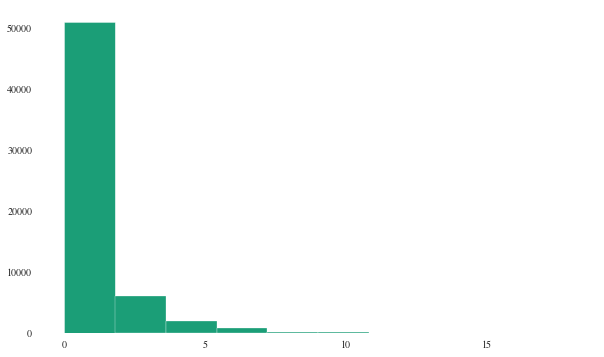

In [61]:
plt.hist(train_data['fundraiser_ebony'])

(array([  5.29450000e+04,   4.87500000e+03,   1.52900000e+03,
          5.12000000e+02,   1.80000000e+02,   6.00000000e+01,
          2.10000000e+01,   3.00000000e+00,   2.00000000e+00,
          2.00000000e+00]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 10 Patch objects>)

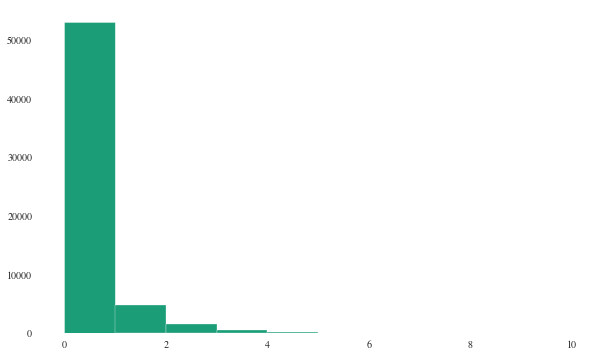

In [62]:
plt.hist(train_data['fundraiser_odyssey'])

(array([  5.63680000e+04,   1.81400000e+03,   1.41200000e+03,
          2.39000000e+02,   1.91000000e+02,   3.90000000e+01,
          3.50000000e+01,   1.40000000e+01,   1.30000000e+01,
          4.00000000e+00]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 10 Patch objects>)

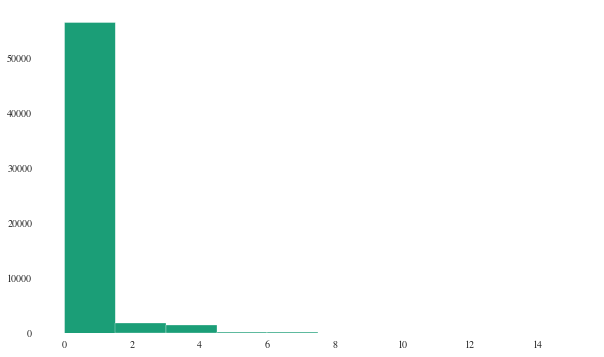

In [63]:
plt.hist(train_data['fundraiser_toku'])

(array([ 35335.,    178.,    520.,    478.,   1230.,    196.,   1176.,
           479.,   1115.,  19422.]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 10 Patch objects>)

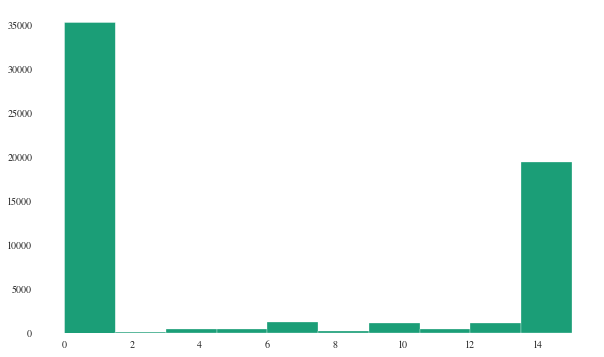

In [64]:
plt.hist(train_data['volunteer_centaur'])

(array([ 36492.,    165.,    493.,    476.,   1199.,    247.,   1118.,
           479.,   1295.,  18165.]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 10 Patch objects>)

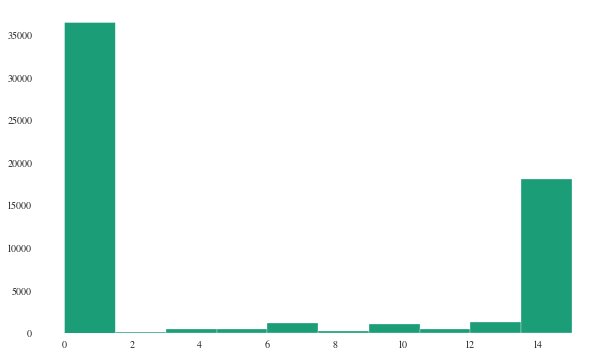

In [65]:
plt.hist(train_data['volunteer_cosmos'])

(array([ 32908.,    168.,    497.,    487.,   1140.,    228.,   1115.,
           475.,   1234.,  21877.]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 10 Patch objects>)

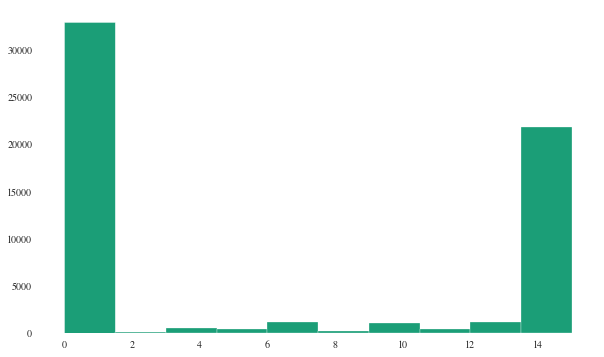

In [66]:
plt.hist(train_data['volunteer_ebony'])

(array([  3.49280000e+04,   1.40000000e+01,   4.40000000e+01,
          4.80000000e+01,   1.25000000e+02,   2.40000000e+01,
          1.13000000e+02,   5.50000000e+01,   3.14000000e+02,
          2.44640000e+04]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 10 Patch objects>)

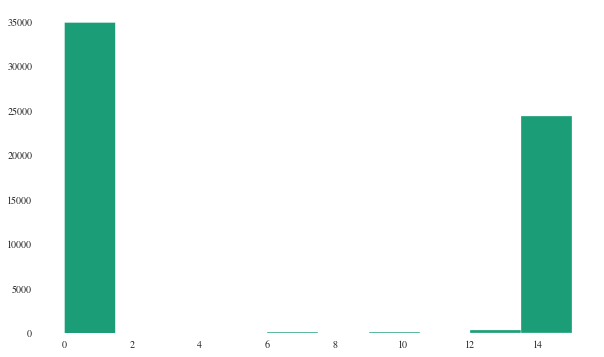

In [67]:
plt.hist(train_data['volunteer_odyssey'])

(array([ 46768.,     48.,    136.,    153.,    490.,    104.,    471.,
           185.,    484.,  11290.]),
 array([  0. ,   1.5,   3. ,   4.5,   6. ,   7.5,   9. ,  10.5,  12. ,
         13.5,  15. ]),
 <a list of 10 Patch objects>)

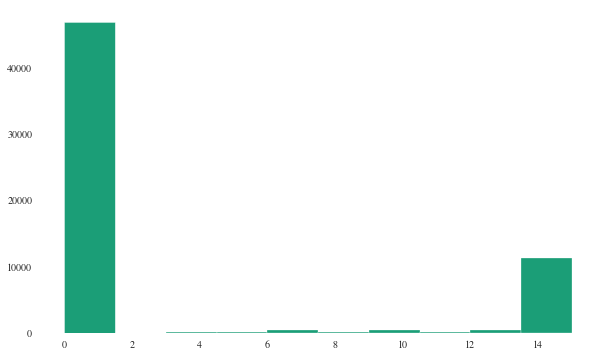

In [68]:
plt.hist(train_data['volunteer_toku'])

(array([  1.66830000e+04,   3.65400000e+03,   2.22530000e+04,
          0.00000000e+00,   1.74320000e+04,   8.30000000e+01,
          0.00000000e+00,   1.70000000e+01,   6.00000000e+00,
          1.00000000e+00]),
 array([ 1. ,  1.7,  2.4,  3.1,  3.8,  4.5,  5.2,  5.9,  6.6,  7.3,  8. ]),
 <a list of 10 Patch objects>)

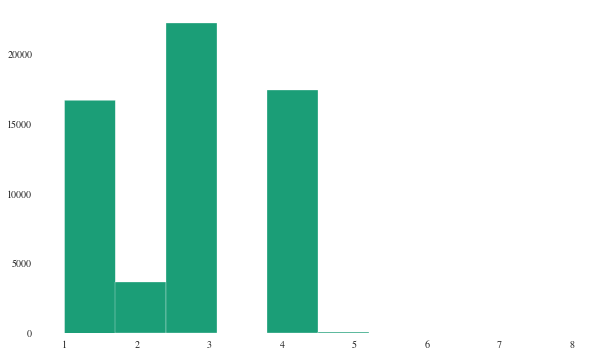

In [69]:
plt.hist(train_data['hh_size'])

(array([ 11803.,      0.,  18347.,      0.,      0.,   9030.,      0.,
         11244.,      0.,   9705.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

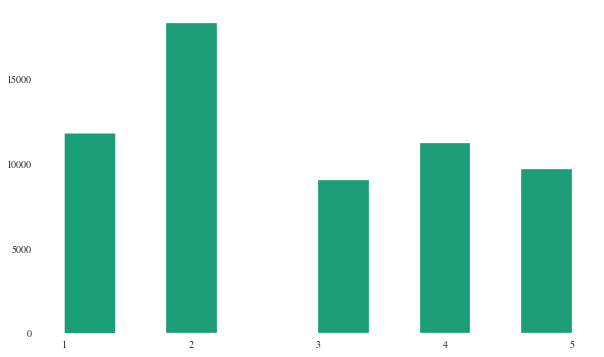

In [70]:
plt.hist(train_data['age_bucket'])

(array([ 17831.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  42298.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

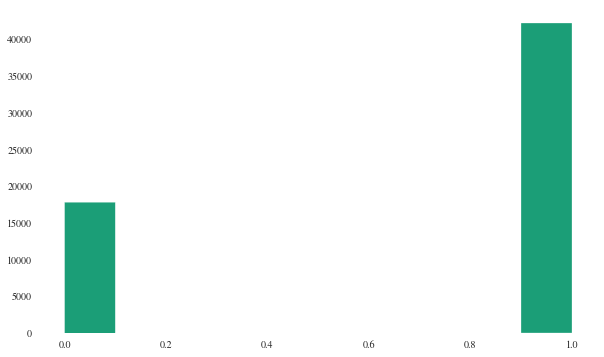

In [71]:
plt.hist(train_data['married'])

(array([ 42052.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  18077.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

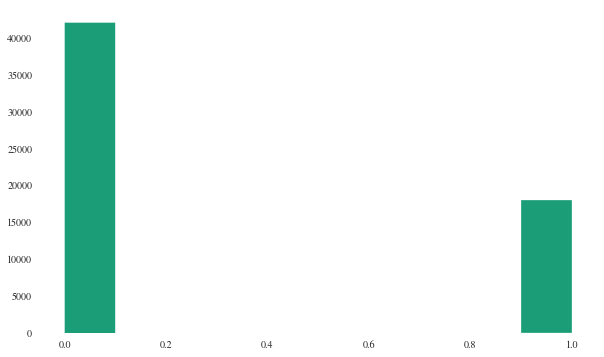

In [72]:
plt.hist(train_data['home_ownership'])

(array([  6548.,      0.,      0.,  18561.,      0.,      0.,  23943.,
             0.,      0.,  11077.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

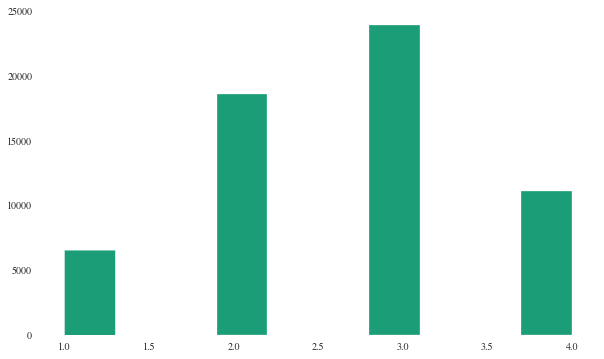

In [73]:
plt.hist(train_data['education_level'])

(array([  1174.,    251.,    673.,   2375.,   6812.,  14266.,  17640.,
         11791.,   4285.,    862.]),
 array([  0. ,   1.1,   2.2,   3.3,   4.4,   5.5,   6.6,   7.7,   8.8,
          9.9,  11. ]),
 <a list of 10 Patch objects>)

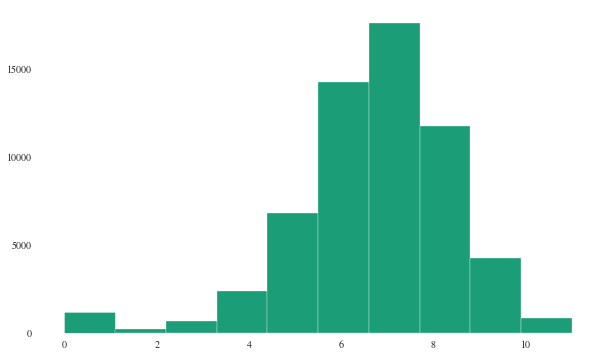

In [74]:
plt.hist(train_data['newspapers'])

In [75]:
def prepare_data(df, is_train):
    age_dummies = pd.get_dummies(df['age_bucket'], prefix='age')
    df = pd.concat([df.drop(['age_bucket'], axis=1), age_dummies.drop(['age_5'], axis=1)], axis=1)
    
    edu_level_dummies = pd.get_dummies(df['education_level'], prefix='ed_level')
    df = pd.concat([df.drop(['education_level'], axis=1), edu_level_dummies.drop(['ed_level_1'], axis=1)], axis=1)

    if is_train:
        return df.drop(['party_voted_past', 'citizen_id', 'prev_residence', 'curr_residence', 'actual_vote'], axis=1)
    return df.drop(['party_voted_past', 'citizen_id', 'prev_residence', 'curr_residence'], axis=1)

In [76]:
train = prepare_data(train_data, 1)
test = prepare_data(test_data, 0)

In [77]:
from xgboost.sklearn import XGBClassifier
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

In [78]:
# xgb = XGBClassifier(n_estimators=100, objective='multi:softmax', silent=False)
# print np.mean(cross_val_score(xgb, train_data.drop(['citizen_id', 'party_voted_past', 'prev_residence', 'curr_residence', 'actual_vote'], axis=1), train_data['actual_vote']))

In [79]:
xgb = XGBClassifier(n_estimators=500, objective='multi:softmax', silent=False)
x_train, x_test, y_train, y_test = train_test_split(train.drop(['num_prev_vote', 'num_actual_vote'], axis=1), train['num_actual_vote'])
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

In [80]:
predicted_train = xgb.predict(x_test)

In [81]:
predicted_train

array([4, 4, 3, ..., 4, 3, 1])

In [82]:
print accuracy_score(y_test, predicted_train)

0.760726401916


In [83]:
y_test = DataFrame(y_test)
y_test.reset_index(inplace=True)
y_test.drop(['index'], axis=1, inplace=True)
y_test.head()

,num_actual_vote
0,4
1,4
2,1
3,2
4,4


In [84]:
pred = DataFrame(predicted_train)
pred.columns = ['predicted']

In [85]:
result = pd.concat([y_test, pred], axis=1)
result.head()

,num_actual_vote,predicted
0,4,4
1,4,4
2,1,3
3,2,2
4,4,4


In [86]:
for row in result.itertuples():
    print row
    break

Pandas(Index=0, num_actual_vote=4, predicted=4)


In [87]:
def print_score(result):
    score = 0
    for row in result.itertuples():
        if (row[1] == row[2]) and (row[1] == train_data.ix[row[0], 'num_prev_vote']):
            score += 50
        elif (row[1] == row[2]) and (row[1] != train_data.ix[row[0], 'num_prev_vote']):
            score += 100
        elif (row[1] != row[2]) and (row[1] != train_data.ix[row[0], 'num_prev_vote']):
            score -= 50
    print score

In [88]:
print_score(result)

882500


In [89]:
predicted_test = xgb.predict(test.drop(['num_prev_vote'], axis=1))

In [90]:
predicted_test

array([1, 3, 1, ..., 5, 4, 5])

In [91]:
predicted_test = DataFrame(predicted_test, columns=['actual_vote'])
predicted_test = predicted_test['actual_vote'].map({1: 'Centaur', 2: 'Ebony', 3: 'Tokugawa', 4: 'Odyssey', 5: 'Cosmos'})
predicted_test

0         Centaur
1        Tokugawa
2         Centaur
3         Centaur
4          Cosmos
5           Ebony
6        Tokugawa
7         Odyssey
8           Ebony
9         Odyssey
10        Centaur
11        Centaur
12        Odyssey
13         Cosmos
14        Odyssey
15          Ebony
16         Cosmos
17        Centaur
18        Odyssey
19        Odyssey
20          Ebony
21        Odyssey
22       Tokugawa
23        Centaur
24        Odyssey
25        Odyssey
26       Tokugawa
27         Cosmos
28       Tokugawa
29        Centaur
           ...   
21177      Cosmos
21178    Tokugawa
21179     Centaur
21180     Centaur
21181      Cosmos
21182       Ebony
21183     Odyssey
21184     Odyssey
21185     Centaur
21186    Tokugawa
21187      Cosmos
21188       Ebony
21189       Ebony
21190     Centaur
21191       Ebony
21192       Ebony
21193      Cosmos
21194    Tokugawa
21195      Cosmos
21196     Centaur
21197     Centaur
21198      Cosmos
21199     Odyssey
21200       Ebony
21201     

In [92]:
solution = pd.concat([DataFrame(test_data['citizen_id']), predicted_test], axis=1)
solution.head()

,citizen_id,actual_vote
0,C70001,Centaur
1,C70002,Tokugawa
2,C70003,Centaur
3,C70004,Centaur
4,C70005,Cosmos


In [93]:
# Export the results to CSV file
solution.to_csv('solution.csv', index=False, header=False)

In [94]:
final_data = pd.read_csv('Data/Final_Dataset.csv')

In [95]:
twist_data = pd.read_csv('Data/Twist_final_data.csv')

In [96]:
twist_data.head(10)

,citizen_id,party_voted_past,mvar1,mvar2,mvar3,mvar4,mvar5,mvar11,mvar12,mvar13,...,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33
0,C130001,Odyssey,0,0,0,8,5,0,0,0,...,7,0,1,55+,1.0,0.0,Masters,6,AET,AFP
1,C130002,Ebony,0,6,0,0,0,0,0,0,...,0,0,1,18-24,0.0,1.0,Masters,7,AII,AII
2,C130003,Tokugawa,0,2,14,6,0,0,0,1,...,15,0,3,25-35,0.0,0.0,Primary,7,ATU,ATU
3,C130004,Odyssey,0,0,0,4,1,0,0,0,...,15,15,3,18-24,0.0,1.0,Degree,8,AWI,ATA
4,C130005,Odyssey,0,0,1,2,2,0,0,0,...,15,15,1,46-55,1.0,0.0,Degree,6,AFX,ACL
5,C130006,Odyssey,0,0,0,7,0,0,0,0,...,15,0,3,25-35,1.0,1.0,Primary,8,ATU,ANG
6,C130007,Cosmos,2,10,14,0,10,0,0,2,...,0,0,3,25-35,1.0,1.0,Degree,7,AEC,AEC
7,C130008,Odyssey,0,0,0,10,0,0,0,0,...,15,0,1,55+,1.0,0.0,Primary,5,AWX,AWX
8,C130009,Cosmos,0,8,2,1,8,0,0,0,...,15,15,3,18-24,1.0,0.0,Masters,7,AEC,ATI
9,C130010,Ebony,0,6,1,0,0,0,0,0,...,0,0,1,25-35,1.0,0.0,Diploma,3,AEC,AEC


In [97]:
len(twist_data.columns)

30

In [98]:
final_data.head(10)

,citizen_id,party_voted_past,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,...,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33
0,C100001,Ebony,0,3,2,0,0,0,2,1,...,0,0,4,18-24,1.0,1.0,Degree,6,ANQ,AER
1,C100002,Tokugawa,0,0,7,0,0,0,0,2,...,0,0,2,36-45,1.0,0.0,Masters,5,ACL,ANQ
2,C100003,Odyssey,0,0,2,2,0,0,0,2,...,15,0,3,18-24,1.0,0.0,Primary,5,ACD,ACD
3,C100004,Ebony,0,5,0,0,0,0,1,0,...,0,0,1,36-45,0.0,0.0,Diploma,8,AHD,AHD
4,C100005,Cosmos,0,0,0,0,5,0,0,0,...,0,15,1,46-55,0.0,0.0,Primary,7,AMS,AHO
5,C100006,Ebony,14,5,0,1,0,10,1,0,...,15,0,1,55+,1.0,0.0,Masters,3,AUD,AUD
6,C100007,Cosmos,0,0,0,0,3,0,0,0,...,0,15,3,18-24,0.0,0.0,Primary,5,AWX,AMS
7,C100008,Cosmos,3,0,0,0,13,1,0,0,...,0,13,4,25-35,1.0,0.0,Degree,9,ATI,ATI
8,C100009,Centaur,4,1,0,0,0,1,0,0,...,0,0,4,25-35,1.0,0.0,Masters,7,AYE,ANO
9,C100010,Centaur,6,0,0,0,0,6,0,0,...,0,0,3,36-45,0.0,0.0,Diploma,7,ARK,BBB


In [99]:
twist_data.columns = ['citizen_id', 'party_voted_past', 'donation_centaur', 'donation_ebony', 'donation_toku', 'donation_odyssey', 'donation_cosmos', 'group_rally_centaur', 'group_rally_ebony', 'group_rally_toku', 'group_rally_odyssey', 'group_rally_cosmos', 'fundraiser_centaur', 'fundraiser_ebony', 'fundraiser_toku', 'fundraiser_odyssey', 'fundraiser_cosmos', 'volunteer_centaur', 'volunteer_ebony', 'volunteer_toku', 'volunteer_odyssey', 'volunteer_cosmos', 'hh_size', 'age_bucket', 'married', 'home_ownership', 'education_level', 'newspapers', 'prev_residence', 'curr_residence']

In [100]:
twist_data.isnull().any()

citizen_id             False
party_voted_past       False
donation_centaur       False
donation_ebony         False
donation_toku          False
donation_odyssey       False
donation_cosmos        False
group_rally_centaur    False
group_rally_ebony      False
group_rally_toku       False
group_rally_odyssey    False
group_rally_cosmos     False
fundraiser_centaur     False
fundraiser_ebony       False
fundraiser_toku        False
fundraiser_odyssey     False
fundraiser_cosmos      False
volunteer_centaur      False
volunteer_ebony        False
volunteer_toku         False
volunteer_odyssey      False
volunteer_cosmos       False
hh_size                False
age_bucket             False
married                 True
home_ownership          True
education_level         True
newspapers             False
prev_residence         False
curr_residence         False
dtype: bool

In [101]:
final_data.columns = ['citizen_id', 'party_voted_past', 'donation_centaur', 'donation_ebony', 'donation_toku', 'donation_odyssey', 'donation_cosmos', 'ind_rally_centaur', 'ind_rally_ebony', 'ind_rally_toku', 'ind_rally_odyssey', 'ind_rally_cosmos', 'group_rally_centaur', 'group_rally_ebony', 'group_rally_toku', 'group_rally_odyssey', 'group_rally_cosmos', 'fundraiser_centaur', 'fundraiser_ebony', 'fundraiser_toku', 'fundraiser_odyssey', 'fundraiser_cosmos', 'volunteer_centaur', 'volunteer_ebony', 'volunteer_toku', 'volunteer_odyssey', 'volunteer_cosmos', 'hh_size', 'age_bucket', 'married', 'home_ownership', 'education_level', 'newspapers', 'prev_residence', 'curr_residence']

In [102]:
final_data.isnull().any()

citizen_id             False
party_voted_past       False
donation_centaur       False
donation_ebony         False
donation_toku          False
donation_odyssey       False
donation_cosmos        False
ind_rally_centaur      False
ind_rally_ebony        False
ind_rally_toku         False
ind_rally_odyssey      False
ind_rally_cosmos       False
group_rally_centaur    False
group_rally_ebony      False
group_rally_toku       False
group_rally_odyssey    False
group_rally_cosmos     False
fundraiser_centaur     False
fundraiser_ebony       False
fundraiser_toku        False
fundraiser_odyssey     False
fundraiser_cosmos      False
volunteer_centaur      False
volunteer_ebony        False
volunteer_toku         False
volunteer_odyssey      False
volunteer_cosmos       False
hh_size                False
age_bucket             False
married                 True
home_ownership          True
education_level         True
newspapers             False
prev_residence         False
curr_residence

In [103]:
twist_data['married'].fillna(stats.mode(train_data['married'].dropna())[0][0], inplace=True)
twist_data['home_ownership'].fillna(stats.mode(train_data['home_ownership'].dropna())[0][0], inplace=True)
twist_data['education_level'].fillna(stats.mode(train_data['education_level'].dropna())[0][0], inplace=True)

In [104]:
twist_data = get_age_buckets(twist_data)
twist_data = get_ed_levels(twist_data)
twist_data['num_prev_vote'] = twist_data['party_voted_past'].map({'Centaur': 1, 'Ebony': 2, 'Tokugawa': 3, 'Odyssey': 4, 'Cosmos': 5})
twist_data['prev_residence_mean'] = twist_data['prev_residence'].map(twist_data.groupby('prev_residence')['num_prev_vote'].mean())
twist_data['prev_residence_std'] = twist_data['prev_residence'].map(twist_data.groupby('prev_residence')['num_prev_vote'].std())
twist_data['prev_residence_mean'].fillna(0)
twist_data['prev_residence_std'].fillna(0)
twist_data.head()

twist_data['curr_residence_mean'] = twist_data['curr_residence'].map(twist_data.groupby('curr_residence')['num_prev_vote'].mean())
twist_data['curr_residence_std'] = twist_data['curr_residence'].map(twist_data.groupby('curr_residence')['num_prev_vote'].std())
twist_data['curr_residence_mean'].fillna(0)
twist_data['curr_residence_std'].fillna(0)
twist_data.head()

twist = prepare_data(twist_data, 0)

In [105]:
xgb_twist = XGBClassifier(n_estimators=500, objective='multi:softmax', silent=False)
x_train_twist, x_test_twist, y_train_twist, y_test_twist = train_test_split(train.drop(['num_prev_vote', 'num_actual_vote', 'ind_rally_centaur', 'ind_rally_ebony', 'ind_rally_toku', 'ind_rally_odyssey', 'ind_rally_cosmos'], axis=1), train['num_actual_vote'])
xgb_twist.fit(x_train_twist, y_train_twist)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=False, subsample=1)

In [106]:
predicted_twist = xgb_twist.predict(twist.drop(['num_prev_vote'], axis=1))
predicted_twist = DataFrame(predicted_twist, columns=['actual_vote'])
predicted_twist = predicted_twist['actual_vote'].map({1: 'Centaur', 2: 'Ebony', 3: 'Tokugawa', 4: 'Odyssey', 5: 'Cosmos'})
solution_twist = pd.concat([DataFrame(twist_data['citizen_id']), predicted_twist], axis=1)
solution_twist.head()

,citizen_id,actual_vote
0,C130001,Cosmos
1,C130002,Ebony
2,C130003,Tokugawa
3,C130004,Odyssey
4,C130005,Cosmos


In [107]:
final_data['married'].fillna(stats.mode(train_data['married'].dropna())[0][0], inplace=True)
final_data['home_ownership'].fillna(stats.mode(train_data['home_ownership'].dropna())[0][0], inplace=True)
final_data['education_level'].fillna(stats.mode(train_data['education_level'].dropna())[0][0], inplace=True)

In [108]:
final_data = get_age_buckets(final_data)
final_data = get_ed_levels(final_data)
final_data['num_prev_vote'] = final_data['party_voted_past'].map({'Centaur': 1, 'Ebony': 2, 'Tokugawa': 3, 'Odyssey': 4, 'Cosmos': 5})
final_data['prev_residence_mean'] = final_data['prev_residence'].map(final_data.groupby('prev_residence')['num_prev_vote'].mean())
final_data['prev_residence_std'] = final_data['prev_residence'].map(final_data.groupby('prev_residence')['num_prev_vote'].std())
final_data['prev_residence_mean'].fillna(0)
final_data['prev_residence_std'].fillna(0)
final_data.head()

final_data['curr_residence_mean'] = final_data['curr_residence'].map(final_data.groupby('curr_residence')['num_prev_vote'].mean())
final_data['curr_residence_std'] = final_data['curr_residence'].map(final_data.groupby('curr_residence')['num_prev_vote'].std())
final_data['curr_residence_mean'].fillna(0)
final_data['curr_residence_std'].fillna(0)
final_data.head()

final = prepare_data(final_data, 0)

In [109]:
predicted_final = xgb.predict(final.drop(['num_prev_vote'], axis=1))
predicted_final = DataFrame(predicted_final, columns=['actual_vote'])
predicted_final = predicted_final['actual_vote'].map({1: 'Centaur', 2: 'Ebony', 3: 'Tokugawa', 4: 'Odyssey', 5: 'Cosmos'})
predicted_final
solution_final = pd.concat([DataFrame(final_data['citizen_id']), predicted_final], axis=1)
solution_final.head()

,citizen_id,actual_vote
0,C100001,Ebony
1,C100002,Tokugawa
2,C100003,Odyssey
3,C100004,Ebony
4,C100005,Cosmos


In [ ]:
# Merge twist and final


In [ ]:
# Export the results to CSV file
solution_upload.to_csv('solution_upload.csv', index=False, header=False)